# About the Data
We have two datasets, the first contains information about clothing, shoes and jewelry products and the second contains information about the reviews of these products. The data was collected from Amazon.com.
### Clothing, Shoes and Jewelry Meta Data
This dataset contains 1,503,384 products and  9 features which are
- asin: ID of the product, e.g. 0000031852
- title: Name of the product
- description: Description of the product
- price: Price in US dollars (at time of crawl)
- imUrl: url of the product image
- related: Related products (also bought, also viewed, bought together, buy after viewing)
- salesRank: Sales rank information of a product within its main category
- brand: Brand name
### Clothing, Shoes and Jewelry Review Data
Our second dataset contains 5,748,920 reviews and 10 features which are
- reviewerID: ID of the reviewer, e.g. A2SUAM1J3GNN3B
- asin: ID of the product, e.g. 0000013714
- reviewerName: name of the reviewer
- helpful: helpfulness rating of the review, e.g. 2/3
- reviewText: text of the review
- overall: rating of the product
- summary: summary of the review
- unixReviewTime: time of the review (unix time)
- reviewTime: time of the review (raw)
- image: images that users post after they have received the product


# Objective
The objective of this notebook is to build a sentiment analysis model that can predict the sentiment of a review. We will use the reviewText feature from the Clothing, Shoes and Jewelry Review Data dataset to train our model. We will use the overall feature as our target variable. We will use the following steps to build our model:
- Data Preprocessing
- Feature Engineering
- Model Building
- Model Evaluation
- Conclusion

In [2]:
import pandas as pd
import gzip


## Data import

In [3]:
file_path = "../unsupervisedText/meta_Clothing_Shoes_and_Jewelry.jsonl.gz"

with gzip.open(file_path, "rt") as file:
    lines = file.readlines()
data = [eval(line) for line in lines]
products = pd.DataFrame(data)
products.head()


,asin,related,title,price,salesRank,imUrl,brand,categories,description
0,0000037214,"{'also_viewed': ['B00JO8II76', 'B00DGN4R1Q', '...",Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...,6.99,{'Clothing': 1233557},http://ecx.images-amazon.com/images/I/31mCncNu...,Big Dreams,"[[Clothing, Shoes & Jewelry, Girls], [Clothing...",NaN
1,0000031887,"{'also_bought': ['0000031852', '0000031895', '...",Ballet Dress-Up Fairy Tutu,6.79,{'Sports &amp; Outdoors': 8547},http://ecx.images-amazon.com/images/I/314qZjYe...,Boutique Cutie,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",This adorable basic ballerina tutu is perfect ...
2,0123456479,"{'also_bought': ['B000BMTCK6', 'B0006JCGUM', '...",SHINING IMAGE HUGE PINK LEATHER JEWELRY BOX / ...,64.98,{'Kitchen & Dining': 16987},http://ecx.images-amazon.com/images/I/413tGhqo...,NaN,"[[Clothing, Shoes & Jewelry, Novelty, Costumes...",Elegance par excellence. Hand-crafted of the f...
3,0456844570,"{'also_viewed': ['B008MTRT1O', 'B00BUG47S4', '...",RiZ Women's Beautify Crafted &frac12; Rimmed F...,NaN,{'Clothing': 1180499},http://ecx.images-amazon.com/images/I/31QZTHxv...,NaN,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",NaN
4,0456808574,"{'also_viewed': ['B00A6JD8EA', 'B00BFL4FTA', '...",Lantin White Visor Wrap Around Ski Style Aviat...,NaN,{'Clothing': 1038084},http://ecx.images-amazon.com/images/I/31UsrgT5...,NaN,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",NaN


In [4]:
products.shape

(1503384, 9)

In [5]:
file_path = "../unsupervisedText/reviews_Clothing_Shoes_and_Jewelry.json.gz"

with gzip.open(file_path, "rt") as file:
    lines = file.readlines()
data = [eval(line) for line in lines]
reviews = pd.DataFrame(data)
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2XVJBSRI3SWDI,0000031887,abigail,"[0, 0]",Perfect red tutu for the price. I baught it as...,5.0,Nice tutu,1383523200,"11 4, 2013"
1,A2G0LNLN79Q6HR,0000031887,"aj_18 ""Aj_18""","[1, 1]",This was a really cute tutu the only problem i...,4.0,Really Cute but rather short.,1337990400,"05 26, 2012"
2,A2R3K1KX09QBYP,0000031887,alert consumer,"[1, 1]",the tutu color was very nice. the only issue w...,2.0,not very good material.,1361059200,"02 17, 2013"
3,A19PBP93OF896,0000031887,"Alinna Satake ""Can't Stop Eating""","[0, 1]",My 3-yr-old daughter received this as a gift f...,1.0,Tiny and Poorly Constructed!,1363824000,"03 21, 2013"
4,A1P0IHU93EF9ZK,0000031887,Amanda,"[0, 0]",Bought it for my daughters first birthday whic...,4.0,i love it,1390435200,"01 23, 2014"


In [6]:
reviews.shape

(5748920, 9)

### Combine the two datasets using ASIN as the key


In [7]:
products = products.set_index('asin')
reviews = reviews.set_index('asin')
df = products.join(reviews, how='inner')
df.head()

,related,title,price,salesRank,imUrl,brand,categories,description,reviewerID,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
asin,,,,,,,,,,,,,,,,
0000031887,"{'also_bought': ['0000031852', '0000031895', '...",Ballet Dress-Up Fairy Tutu,6.79,{'Sports &amp; Outdoors': 8547},http://ecx.images-amazon.com/images/I/314qZjYe...,Boutique Cutie,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",This adorable basic ballerina tutu is perfect ...,A2XVJBSRI3SWDI,abigail,"[0, 0]",Perfect red tutu for the price. I baught it as...,5.0,Nice tutu,1383523200,"11 4, 2013"
0000031887,"{'also_bought': ['0000031852', '0000031895', '...",Ballet Dress-Up Fairy Tutu,6.79,{'Sports &amp; Outdoors': 8547},http://ecx.images-amazon.com/images/I/314qZjYe...,Boutique Cutie,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",This adorable basic ballerina tutu is perfect ...,A2G0LNLN79Q6HR,"aj_18 ""Aj_18""","[1, 1]",This was a really cute tutu the only problem i...,4.0,Really Cute but rather short.,1337990400,"05 26, 2012"
0000031887,"{'also_bought': ['0000031852', '0000031895', '...",Ballet Dress-Up Fairy Tutu,6.79,{'Sports &amp; Outdoors': 8547},http://ecx.images-amazon.com/images/I/314qZjYe...,Boutique Cutie,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",This adorable basic ballerina tutu is perfect ...,A2R3K1KX09QBYP,alert consumer,"[1, 1]",the tutu color was very nice. the only issue w...,2.0,not very good material.,1361059200,"02 17, 2013"
0000031887,"{'also_bought': ['0000031852', '0000031895', '...",Ballet Dress-Up Fairy Tutu,6.79,{'Sports &amp; Outdoors': 8547},http://ecx.images-amazon.com/images/I/314qZjYe...,Boutique Cutie,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",This adorable basic ballerina tutu is perfect ...,A19PBP93OF896,"Alinna Satake ""Can't Stop Eating""","[0, 1]",My 3-yr-old daughter received this as a gift f...,1.0,Tiny and Poorly Constructed!,1363824000,"03 21, 2013"
0000031887,"{'also_bought': ['0000031852', '0000031895', '...",Ballet Dress-Up Fairy Tutu,6.79,{'Sports &amp; Outdoors': 8547},http://ecx.images-amazon.com/images/I/314qZjYe...,Boutique Cutie,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",This adorable basic ballerina tutu is perfect ...,A1P0IHU93EF9ZK,Amanda,"[0, 0]",Bought it for my daughters first birthday whic...,4.0,i love it,1390435200,"01 23, 2014"


In [63]:
df.shape

(278677, 16)

In [10]:
df = df.reset_index()
df.head()

,asin,related,title,price,salesRank,imUrl,brand,categories,description,reviewerID,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,0000031887,"{'also_bought': ['0000031852', '0000031895', '...",Ballet Dress-Up Fairy Tutu,6.79,{'Sports &amp; Outdoors': 8547},http://ecx.images-amazon.com/images/I/314qZjYe...,Boutique Cutie,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",This adorable basic ballerina tutu is perfect ...,A2XVJBSRI3SWDI,abigail,"[0, 0]",Perfect red tutu for the price. I baught it as...,5.0,Nice tutu,1383523200,"11 4, 2013"
1,0000031887,"{'also_bought': ['0000031852', '0000031895', '...",Ballet Dress-Up Fairy Tutu,6.79,{'Sports &amp; Outdoors': 8547},http://ecx.images-amazon.com/images/I/314qZjYe...,Boutique Cutie,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",This adorable basic ballerina tutu is perfect ...,A2G0LNLN79Q6HR,"aj_18 ""Aj_18""","[1, 1]",This was a really cute tutu the only problem i...,4.0,Really Cute but rather short.,1337990400,"05 26, 2012"
2,0000031887,"{'also_bought': ['0000031852', '0000031895', '...",Ballet Dress-Up Fairy Tutu,6.79,{'Sports &amp; Outdoors': 8547},http://ecx.images-amazon.com/images/I/314qZjYe...,Boutique Cutie,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",This adorable basic ballerina tutu is perfect ...,A2R3K1KX09QBYP,alert consumer,"[1, 1]",the tutu color was very nice. the only issue w...,2.0,not very good material.,1361059200,"02 17, 2013"
3,0000031887,"{'also_bought': ['0000031852', '0000031895', '...",Ballet Dress-Up Fairy Tutu,6.79,{'Sports &amp; Outdoors': 8547},http://ecx.images-amazon.com/images/I/314qZjYe...,Boutique Cutie,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",This adorable basic ballerina tutu is perfect ...,A19PBP93OF896,"Alinna Satake ""Can't Stop Eating""","[0, 1]",My 3-yr-old daughter received this as a gift f...,1.0,Tiny and Poorly Constructed!,1363824000,"03 21, 2013"
4,0000031887,"{'also_bought': ['0000031852', '0000031895', '...",Ballet Dress-Up Fairy Tutu,6.79,{'Sports &amp; Outdoors': 8547},http://ecx.images-amazon.com/images/I/314qZjYe...,Boutique Cutie,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",This adorable basic ballerina tutu is perfect ...,A1P0IHU93EF9ZK,Amanda,"[0, 0]",Bought it for my daughters first birthday whic...,4.0,i love it,1390435200,"01 23, 2014"


In [11]:
df.columns

Index(['asin', 'related', 'title', 'price', 'salesRank', 'imUrl', 'brand',
       'categories', 'description', 'reviewerID', 'reviewerName', 'helpful',
       'reviewText', 'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

## Drop Duplicates

In [12]:
df.drop_duplicates(subset=['asin'], keep='first')

,asin,related,title,price,salesRank,imUrl,brand,categories,description,reviewerID,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,0000031887,"{'also_bought': ['0000031852', '0000031895', '...",Ballet Dress-Up Fairy Tutu,6.79,{'Sports &amp; Outdoors': 8547},http://ecx.images-amazon.com/images/I/314qZjYe...,Boutique Cutie,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",This adorable basic ballerina tutu is perfect ...,A2XVJBSRI3SWDI,abigail,"[0, 0]",Perfect red tutu for the price. I baught it as...,5.0,Nice tutu,1383523200,"11 4, 2013"
236,0000037214,"{'also_viewed': ['B00JO8II76', 'B00DGN4R1Q', '...",Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...,6.99,{'Clothing': 1233557},http://ecx.images-amazon.com/images/I/31mCncNu...,Big Dreams,"[[Clothing, Shoes & Jewelry, Girls], [Clothing...",NaN,ARTHT19OB79VZ,Natalie,"[1, 1]",Way smaller. Fits infant but not up to 7 my da...,1.0,:(,1389571200,"01 13, 2014"
237,0123456479,"{'also_bought': ['B000BMTCK6', 'B0006JCGUM', '...",SHINING IMAGE HUGE PINK LEATHER JEWELRY BOX / ...,64.98,{'Kitchen & Dining': 16987},http://ecx.images-amazon.com/images/I/413tGhqo...,NaN,"[[Clothing, Shoes & Jewelry, Novelty, Costumes...",Elegance par excellence. Hand-crafted of the f...,A2H34UBQY7SN9Q,A. C. Patrut,"[0, 0]",Very simple...I love it because she loves it. ...,5.0,Good,1368835200,"05 18, 2013"
315,0456787283,"{'also_viewed': ['B00AIPLH22', 'B005P1H8KO', '...",FX1 Small Adult Aviator Sunglasses with Silver...,NaN,{'Clothing': 456854},http://ecx.images-amazon.com/images/I/31dS6eGu...,NaN,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",NaN,A1KI7OVGTVEMPJ,disneybound,"[1, 1]",I bought these with hopes they would not have ...,1.0,still too large,1363392000,"03 16, 2013"
316,0456808574,"{'also_viewed': ['B00A6JD8EA', 'B00BFL4FTA', '...",Lantin White Visor Wrap Around Ski Style Aviat...,NaN,{'Clothing': 1038084},http://ecx.images-amazon.com/images/I/31UsrgT5...,NaN,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",NaN,A2EG5K051HXX62,JanVan,"[0, 0]",Love these. Very sporty and great price. The...,5.0,Great looking,1398643200,"04 28, 2014"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5748902,B00LT2HE7A,{'also_viewed': ['B00E63GYSY']},Musical Holiday Women's Sateen Bridal Wedding ...,65.00,{'Clothing': 177976},http://ecx.images-amazon.com/images/I/31ZsEvg4...,NaN,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",NaN,A2723S3UN0Q50K,Paul Ramon,"[0, 0]",My girlfriend has bought a few dresses from th...,5.0,Awesome Dress,1405900800,"07 21, 2014"
5748903,B00LU0ZXJM,NaN,Realtree Ruffle Spa Wrap + Mossy Oak Pink Scru...,NaN,NaN,http://ecx.images-amazon.com/images/I/41mJKa23...,NaN,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",NaN,A1H04CRIJ2ASD6,Jackie Carlson,"[1, 1]",Fits perfecty and washes up very nice slight s...,5.0,comfortable wrap great for after shower or pool!,1405382400,"07 15, 2014"
5748905,B00LU8ZCTU,"{'also_bought': ['B00C9LSE7Y'], 'also_viewed':...",It's Sterling Silver Heart Necklace with Made ...,24.99,{'Jewelry': 29873},http://ecx.images-amazon.com/images/I/41wBDoXB...,NaN,"[[Clothing, Shoes & Jewelry, Women], [Clothing...",NaN,A354WEIF9688SG,carla,"[0, 0]",Such a beautiful necklace! Soooo worth it. Wou...,5.0,Beautiful :),1405900800,"07 21, 2014"
5748917,B00LV5LDYK,NaN,Women's Empire Waist with Tummy Control/ Full ...,NaN,NaN,http://ecx.images-amazon.com/images/I/416PfDL1...,NaN,"[[Clothing, Shoes & Jewelry, Women], [Clothing...",NaN,A5007NDXGUUT1,Sylvia Brainard,"[0, 0]","This is a nice separate bottom to have, I can ...",5.0,Nice bottom seperate,1405987200,"07 22, 2014"


In [14]:
df.shape

(5748920, 17)

# Data Preprocessing

## Data Visualization

<Axes: title={'center': 'Sentiment distribution'}, xlabel='Sentiment', ylabel='Count'>

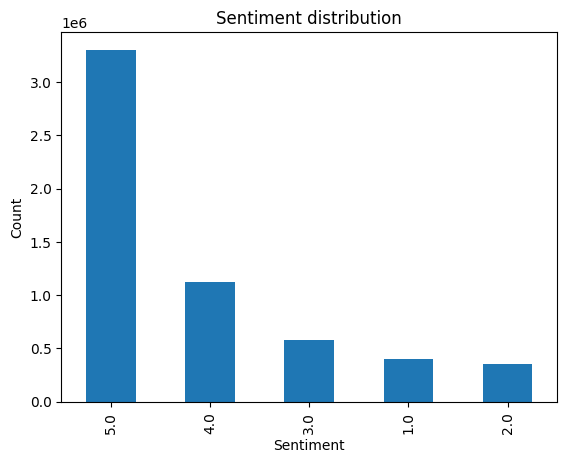

In [19]:
df["overall"].value_counts().plot(kind='bar', title='Sentiment distribution', xlabel='Sentiment', ylabel='Count')


In [20]:
seq_len = 512
num_samples = len(df)
num_samples, seq_len

(5748920, 512)

In [21]:
from transformers import BertTokenizer

c:\Users\luisr\anaconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [22]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

c:\Users\luisr\anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\luisr\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [23]:
tokens = tokenizer(df['reviewText'].tolist(), padding='max_length', truncation=True, max_length=seq_len, add_special_tokens=True, return_tensors='np')